<a href="https://colab.research.google.com/github/MohebZandi/Comupter_Vision/blob/main/CIFAR100_ResNet32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
# Write one custom transform: RandomHorizontalFlip

from PIL import Image
import random

class RandomHorizontalFlip(object):
    """Horizontally flip the given PIL Image randomly with a given probability.
    Args:
        p (float): probability of the image being flipped. Default value is 0.5
    """

    def __init__(self, p=0.5):
        self.p = p
    
    def __call__(self, img):
        """
        Args:
            img (PIL Image): Image to be flipped.
        Returns:
            PIL Image: Randomly flipped image.
        """
        if random.random() < self.p:
            img = img.transpose(Image.FLIP_LEFT_RIGHT)

        return img

In [4]:
batch_size = 256
input_size=32

data_transforms = {
    'train': transforms.Compose([
        RandomHorizontalFlip(0.5),
        transforms.RandomCrop(32, 4),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(input_size),
        transforms.CenterCrop(input_size),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

trainset = torchvision.datasets.CIFAR100(root='./data/CIFAR100', train=True,
                                        download=True, transform=data_transforms["train"])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR100(root='./data/CIFAR100', train=False,
                                       download=True, transform=data_transforms["test"])

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('apples', 'aquarium fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottles', 
           'bowls', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'cans', 'castle', 'caterpillar', 'cattle', 'chair', 
           'chimpanzee', 'clock', 'cloud', 'cockroach', 'computer keyboard', 'couch', 'crab', 'crocodile', 
           'cups', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 
           'kangaroo', 'lamp', 'lawn-mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple', 'motorcycle', 
           'mountain', 'mouse', 'mushrooms', 'oak', 'oranges', 'orchids', 'otter', 'palm', 'pears', 'pickup truck', 
           'pine', 'plain', 'plates', 'poppies', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 
           'roses', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 
           'streetcar', 'sunflowers', 'sweet peppers', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
           'train', 'trout', 'tulips', 'turtle', 'wardrobe', 'whale', 'willow', 'wolf', 'woman', 'worm')

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./data/CIFAR100/cifar-100-python.tar.gz to ./data/CIFAR100
Files already downloaded and verified


In [5]:
# let's visualize some examples
import matplotlib.pyplot as plt
import numpy as np

In [6]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


196
torch.Size([256, 3, 32, 32])
torch.Size([256])
tensor([49, 33, 72, 51, 71, 92, 15, 14, 23,  0, 71, 75, 81, 69, 40, 43, 92, 97,
        70, 53, 70, 49, 75, 29, 21, 16, 39,  8,  8, 70, 20, 61, 41, 93, 56, 73,
        58, 11, 25, 37, 63, 24, 49, 73, 56, 22, 41, 58, 75, 17,  4,  6,  9, 57,
         2, 32, 71, 52, 42, 69, 77, 27, 15, 65,  7, 35, 43, 82, 63, 92, 66, 90,
        67, 91, 32, 32, 82, 10, 77, 22, 71, 78, 54,  6, 29, 89, 78, 33, 11, 67,
        22, 18, 27, 21, 13, 21, 50, 75, 37, 35, 26, 83, 47, 95, 43, 69, 76, 17,
        57, 59, 25, 20, 27,  0,  9, 71,  8, 43, 57, 56, 85, 10, 19, 92, 33, 20,
        21, 50, 70, 46, 11, 16,  1, 74, 33, 91, 60, 64, 52, 23,  4, 11, 52, 37,
        24, 95, 25, 39, 51, 58, 58, 77, 18, 59, 45, 66, 58, 20, 24,  4, 36,  8,
        87, 10, 30, 47, 54, 99, 51, 83,  9, 37,  4, 83, 95, 83, 32, 73, 18, 40,
        39, 64, 22, 80, 28, 28, 40, 95, 98, 83, 12, 24, 45, 13, 94, 24, 58, 63,
         7, 87,  6, 78, 68, 60,  6, 23, 44, 31, 80, 93, 73, 98, 49, 9

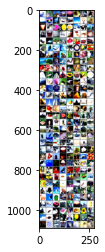

mountain flatfish  seal mushrooms   sea tulips camel butterfly cloud apples   sea skunk streetcar rocket  lamp  lion tulips  wolf roses oranges roses mountain skunk  cups chimpanzee  cans kangaroo bicycle bicycle roses chair plates lawn-mower turtle  palm shark pickup truck   boy computer keyboard hamster porcupine cockroach mountain shark  palm clock lawn-mower pickup truck skunk castle beaver   bee bottles pears  baby elephant   sea   oak leopard rocket snail  crab camel rabbit beetle   fox  lion sunflowers porcupine tulips raccoon train   ray trout elephant elephant sunflowers bowls snail clock   sea snake orchids   bee  cups tractor snake flatfish   boy   ray clock caterpillar  crab chimpanzee   bus chimpanzee mouse skunk hamster   fox couch sweet peppers maple whale  lion rocket skyscraper castle pears  pine computer keyboard chair  crab apples bottles   sea bicycle  lion pears  palm  tank bowls cattle tulips flatfish chair chimpanzee mouse roses   man   boy  cans aquarium fish sh

In [7]:
# get some random training images
dataiter = iter(testloader)
images, labels = dataiter.next()

print(len(trainloader))
print(images.shape)
print(labels.shape)
print(labels)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [8]:
# if you want to train on GPU:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


In [9]:
# Define CIFAR ResNet impementations from https://arxiv.org/abs/1512.03385
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init

from torch.autograd import Variable

def _weights_init(m):
    classname = m.__class__.__name__
    #print(classname)
    if isinstance(m, nn.Linear) or isinstance(m, nn.Conv2d):
        init.kaiming_normal_(m.weight)

class LambdaLayer(nn.Module):
    def __init__(self, lambd):
        super(LambdaLayer, self).__init__()
        self.lambd = lambd

    def forward(self, x):
        return self.lambd(x)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1, option='A'):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != planes:
            if option == 'A':
                """
                For CIFAR10 ResNet paper uses option A.
                """
                self.shortcut = LambdaLayer(lambda x:
                                            F.pad(x[:, :, ::2, ::2], (0, 0, 0, 0, planes//4, planes//4), "constant", 0))
            elif option == 'B':
                self.shortcut = nn.Sequential(
                     nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                     nn.BatchNorm2d(self.expansion * planes)
                )

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.relu(out)
        return out


class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=100):
        super(ResNet, self).__init__()
        self.in_planes = 16

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(16)
        self.layer1 = self._make_layer(block, 16, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 32, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 64, num_blocks[2], stride=2)
        self.linear = nn.Linear(64, num_classes)

        self.apply(_weights_init)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion

        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = F.avg_pool2d(out, out.size()[3])
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out


def resnet20(num_classes=100):
    return ResNet(BasicBlock, [3, 3, 3], num_classes=num_classes)


def resnet32(num_classes=100):
    return ResNet(BasicBlock, [5, 5, 5], num_classes=num_classes)


def resnet44(num_classes=100):
    return ResNet(BasicBlock, [7, 7, 7], num_classes=num_classes)


def resnet56(num_classes=100):
    return ResNet(BasicBlock, [9, 9, 9], num_classes=num_classes)


def resnet110(num_classes=100):
    return ResNet(BasicBlock, [18, 18, 18], num_classes=num_classes)


def resnet1202(num_classes=100):
    return ResNet(BasicBlock, [200, 200, 200], num_classes=num_classes)

In [10]:
learning_rate = 0.1
weight_decay = 1e-4

model = resnet32(num_classes=100)

model.to(device)

model.train()

# base optimizer with following parameters:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=weight_decay)

lr_scheduler = torch.optim.lr_scheduler.MultiStepLR(
    optimizer,
    milestones=[100, 150],
    last_epoch=-1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


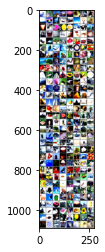

GroundTruth:  mountain flatfish  seal mushrooms   sea tulips camel butterfly cloud apples   sea skunk streetcar rocket  lamp  lion tulips  wolf roses oranges roses mountain skunk  cups chimpanzee  cans kangaroo bicycle bicycle roses chair plates lawn-mower turtle  palm shark pickup truck   boy computer keyboard hamster porcupine cockroach mountain shark  palm clock lawn-mower pickup truck skunk castle beaver   bee bottles pears  baby elephant   sea   oak leopard rocket snail  crab camel rabbit beetle   fox  lion sunflowers porcupine tulips raccoon train   ray trout elephant elephant sunflowers bowls snail clock   sea snake orchids   bee  cups tractor snake flatfish   boy   ray clock caterpillar  crab chimpanzee   bus chimpanzee mouse skunk hamster   fox couch sweet peppers maple whale  lion rocket skyscraper castle pears  pine computer keyboard chair  crab apples bottles   sea bicycle  lion pears  palm  tank bowls cattle tulips flatfish chair chimpanzee mouse roses   man   boy  cans aq

In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

outputs = model(images.cuda())
_, predicted = torch.max(outputs.data, 1)
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]for j in range(batch_size)))

In [16]:
%%time

num_epoch = 50
save_dir = "checkpoints/"
save_name = "resnet32"
save_every = 5


import os

def create_dir(_dir):
    """
    Creates given directory if it is not present.
    """
    if not os.path.exists(_dir):
        os.makedirs(_dir)

def save_checkpoint(state, filename):
    """
    Save the training model
    """
    create_dir(os.path.dirname(filename))
    torch.save(state, filename)
    
def train_one_epoch(trainloader, optimizer, criterion, model, epoch):
    """
    Train model for one epoch
    """
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # print statistics
    print('[%d, %5d] loss: %.3f' %
          (epoch+1, i+1, running_loss/len(trainloader)))
    running_loss = 0.0

# Training loop
for epoch in range(num_epoch):  # loop over the dataset multiple times

    # train
    train_one_epoch(
        trainloader=trainloader,
        optimizer=optimizer,
        criterion=criterion,
        model=model,
        epoch=epoch
    )

    # save checkpoint every save_every epochs
    if epoch > 0 and epoch % save_every == 0:
        save_checkpoint(
            state={
                'epoch': epoch + 1,
                'state_dict': model.state_dict(),
            },
            filename=os.path.join(save_dir, save_name+'_checkpoint.th')
        )
    
    lr_scheduler.step()
    print('Epoch Number: %g'%(epoch+1))

# save final model
save_checkpoint(
    state={
        'state_dict': model.state_dict(),
    },
    filename=os.path.join(save_dir, save_name+'_final.th')
)



print('Finished Training')

[1,   196] loss: 2.573
Epoch Number: 1
[2,   196] loss: 2.367
Epoch Number: 2
[3,   196] loss: 2.203
Epoch Number: 3
[4,   196] loss: 2.048
Epoch Number: 4
[5,   196] loss: 1.942
Epoch Number: 5
[6,   196] loss: 1.842
Epoch Number: 6
[7,   196] loss: 1.757
Epoch Number: 7
[8,   196] loss: 1.700
Epoch Number: 8
[9,   196] loss: 1.622
Epoch Number: 9
[10,   196] loss: 1.560
Epoch Number: 10
[11,   196] loss: 1.515
Epoch Number: 11
[12,   196] loss: 1.466
Epoch Number: 12
[13,   196] loss: 1.431
Epoch Number: 13
[14,   196] loss: 1.380
Epoch Number: 14
[15,   196] loss: 1.353
Epoch Number: 15
[16,   196] loss: 1.324
Epoch Number: 16
[17,   196] loss: 1.292
Epoch Number: 17
[18,   196] loss: 1.262
Epoch Number: 18
[19,   196] loss: 1.245
Epoch Number: 19
[20,   196] loss: 1.217
Epoch Number: 20
[21,   196] loss: 1.195
Epoch Number: 21
[22,   196] loss: 1.161
Epoch Number: 22
[23,   196] loss: 1.154
Epoch Number: 23
[24,   196] loss: 1.130
Epoch Number: 24
[25,   196] loss: 1.117
Epoch Numb

In [17]:
# test on all test data
PATH="checkpoints/resnet32_final.th"
model.load_state_dict(torch.load(PATH)["state_dict"])
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(correct)
print(total)
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

5940
10000
Accuracy of the network on the 10000 test images: 59 %


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
save_drive = "/content/drive/MyDrive/Colab Notebooks"
save_name = "resnet32"

save_checkpoint(
    state={
        'state_dict': model.state_dict(),
    },
    filename=os.path.join(save_drive, save_name+'_final.th'))